In [1]:
from statlib.simple_distribs import Cauchy, Pareto
from statlib.rand.basic_rand import BasicRand
from statlib.rand.engine import JLKiss64RandEngine
from matplotlib import pyplot as plt
import numpy as np

### Создадим генератор случайной величины

In [2]:
gen = BasicRand(JLKiss64RandEngine())

par = Pareto(gen)

#### Начальные параметры для гистограмм

In [41]:
def get_bins_count(n):
    if n <= 100:
        return int(np.sqrt(n))
    else:
        return 4 * int(np.log10(n))

n = 1000000
segments = get_bins_count(nsamples)

### Равноинтервальная гистограмма

(array([5.33455e+05, 2.47684e+05, 1.15614e+05, 5.42960e+04, 2.55410e+04,
        1.23040e+04, 5.86500e+03, 2.75100e+03, 1.30000e+03, 5.62000e+02,
        3.13000e+02, 1.62000e+02, 6.70000e+01, 4.10000e+01, 2.50000e+01,
        8.00000e+00, 7.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000002, 1.00766174, 1.01532347, 1.02298519, 1.03064691,
        1.03830863, 1.04597035, 1.05363207, 1.0612938 , 1.06895552,
        1.07661724, 1.08427896, 1.09194068, 1.0996024 , 1.10726412,
        1.11492585, 1.12258757, 1.13024929, 1.13791101, 1.14557273,
        1.15323445, 1.16089618, 1.1685579 , 1.17621962, 1.18388134]),
 <a list of 24 Patch objects>)

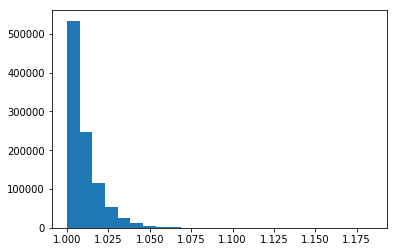

In [42]:
res = []

for _ in range(nsamples):
    res.append(par.next(1, 100))

plt.hist(res, bins=segments)

In [43]:
x_var = sorted(res)
counts = {}
for x in x_var:
    counts[x] = counts.get(x, 0) + 1
    
F = [0]
for i in range(len(x_var) - 1):
    F.append(F[i] + counts[x_var[i]] / n)

def distr_fun(x):
    for i in range(1, len(x_var)):
        if x_var[i - 1] <= x < x_var[i]:
            return F[i - 1]
    return 1

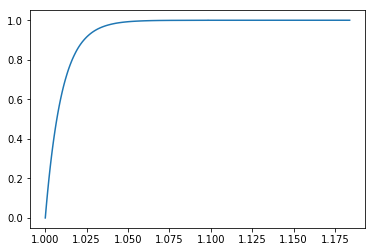

In [44]:
plt.step(sorted(res), F)

### Равновероятностная гистограмма

[1.0000000230059383, 1.0004246822003116, 1.0008704388808116, 1.00133457545762, 1.0018258717988848, 1.0023382984473808, 1.0028804701432463, 1.0034577118724868, 1.004066683226431, 1.0047207482502605, 1.005414990753399, 1.0061593325566847, 1.0069671948528554, 1.0078415423952292, 1.0087994345950015, 1.0098669170052306, 1.0110520273804906, 1.0124122389127084, 1.0139639953483992, 1.0158236420571776, 1.018091435607376, 1.0210086870512547, 1.0251877923676536, 1.032312438633657, 1.117825941030711, 1.1838813403382142]


(array([9.81163261e+01, 9.34725195e+01, 8.97709900e+01, 8.48082847e+01,
        8.13111498e+01, 7.68501940e+01, 7.21811988e+01, 6.84202955e+01,
        6.37031464e+01, 6.00164925e+01, 5.59769716e+01, 5.15756215e+01,
        4.76538195e+01, 4.34975877e+01, 3.90320249e+01, 3.51579067e+01,
        3.06320003e+01, 2.68508633e+01, 2.24053310e+01, 1.83729246e+01,
        1.42826221e+01, 9.97007657e+00, 5.84814999e+00, 4.87244690e-01,
        2.42220926e-04]),
 array([1.00000002, 1.00042468, 1.00087044, 1.00133458, 1.00182587,
        1.0023383 , 1.00288047, 1.00345771, 1.00406668, 1.00472075,
        1.00541499, 1.00615933, 1.00696719, 1.00784154, 1.00879943,
        1.00986692, 1.01105203, 1.01241224, 1.013964  , 1.01582364,
        1.01809144, 1.02100869, 1.02518779, 1.03231244, 1.11782594,
        1.18388134]),
 <a list of 25 Patch objects>)

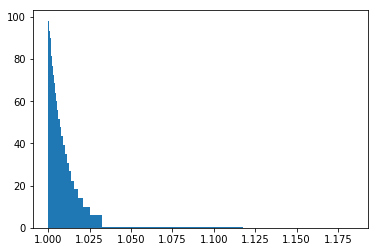

In [48]:
borders_eq = [x_var[0]] + [(x_var[i] + x_var[i + 1]) / 2 for i in range(n // segments - 1, n - 1, n // segments)] + [x_var[-1]]

print(borders_eq)

plt.hist(x_var, bins=borders_eq, density=True)
#plt.plot(res, H)